In [33]:
import pandas as pd 
import numpy as np 
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
tf.keras.models.load_model('saved_model/my_model')

In [2]:
categories = [str(x) for x in range(1,101)]
train_path = "UECFOOD100_CROP/UECFOOD100_CROP/train"
test_path =  "UECFOOD100_CROP/UECFOOD100_CROP/test"
multiple_labels_path = "labels/multiple_food.txt"
multiple_food = pd.DataFrame()

mlb = MultiLabelBinarizer(categories)

def build_multiple_food_df():
    with open(multiple_labels_path) as f:
        contents = f.read().split('\n')
        labels = []
        images = []
        for content in contents[1:]:
            label = content.split(" ")[1:]
            label = label[:len(label)-1]
            labels.append(label)
            images.append(content.split(" ")[0])

        multiple_food["image"] = images
        multiple_food["labels"] = labels

def build_category_files(df_path):
    category_files = []
    for category in categories:
        category_path = os.path.join(df_path, str(category))
        category_files = category_files + [os.path.join(str(category), i) for i in os.listdir(category_path) if os.path.isfile(os.path.join(category_path,i))]
    return category_files
        
def build_category_labels(category_files):
    category_labels = []
    for file in category_files:
        number = file.split("\\")[1].split(".jpg")[0]
        category = file.split("\\")[0]
        multiple = multiple_food[multiple_food['image'] == number]
        labels = []
        if len(multiple) > 0:
            labels = mlb.fit_transform(list(multiple_food[multiple_food['image'] == number]["labels"]))
        else:
            labels = mlb.fit_transform(list([[category]]))
        category_labels.append(labels[0])
    return category_labels
    


C:\Users\cheew\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [3]:
build_multiple_food_df()
print("Length of Multiple Food: " + str(len(multiple_food)))

Length of Multiple Food: 1174


In [4]:
# Train Images
train_category_files = build_category_files(train_path)
train_category_labels = build_category_labels(train_category_files)
train_df = pd.DataFrame(train_category_labels, columns=categories)
train_df["filename"] = train_category_files

# Test Images
test_category_files = build_category_files(test_path)
test_category_labels = build_category_labels(test_category_files)
test_df = pd.DataFrame(test_category_labels, columns=categories)
test_df["filename"] = test_category_files

In [5]:
print(train_df.shape)
print(test_df.shape)

(11514, 101)
(2902, 101)


In [6]:
train_df.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,filename
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1\1.jpg
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1\10572.jpg
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1\10586.jpg
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1\10618.jpg
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1\10621.jpg


In [7]:
test_df.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,filename
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1\10.jpg
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1\10617.jpg
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1\10740.jpg
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1\11134.jpg
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1\11161.jpg


## Image Loader and Augmentation

In [8]:
datagen=ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [9]:
train_generator=datagen.flow_from_dataframe(
dataframe=train_df,
directory="./UECFOOD100_CROP/UECFOOD100_CROP/train",
x_col="filename",
y_col=categories,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(128,128))

Found 11514 validated image filenames.


In [10]:
test_generator=ImageDataGenerator(rescale=1./255)

test_generator=datagen.flow_from_dataframe(
dataframe=test_df,
directory="./UECFOOD100_CROP/UECFOOD100_CROP/test",
x_col="filename",
y_col=categories,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(128,128))

Found 2902 validated image filenames.


## Model Training

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, utils

from tensorflow.keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras.layers import Input
import tensorflow as tf
import matplotlib.pyplot as plt

### InceptionV3

In [64]:
optimizer = Adam(lr = .001)

inception = InceptionV3(weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False
    
x = inception.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(2048,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(100,kernel_regularizer=regularizers.l2(0.005), activation='sigmoid')(x)
model = models.Model(inputs=inception.input, outputs=predictions)
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['binary_accuracy'])
model.summary()

#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)


C:\Users\cheew\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_97 (BatchNo (None, None, None, 3 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 3 0           batch_normalization_97[0][0]     
____________________________________________________________________________________________

In [12]:
!python --version
import tensorflow as tf
print("Num GPUs Available", len(tf.config.experimental.list_physical_devices('GPU')))

Python 3.8.8
Num GPUs Available 1


In [65]:
model.evaluate(test_generator)

91/91 [==============================] - 14s 141ms/step - loss: 1.9470 - binary_accuracy: 0.5111


[1.94696843624115, 0.5110613107681274]

In [69]:
#With training and validation data
history1 = model.fit(train_generator, validation_data=test_generator,epochs=50, verbose=True,  callbacks=[early_stop, rlrop])

Epoch 1/50
360/360 [==============================] - 65s 174ms/step - loss: 0.1714 - binary_accuracy: 0.9849 - val_loss: 0.0757 - val_binary_accuracy: 0.9871
Epoch 2/50
360/360 [==============================] - 63s 176ms/step - loss: 0.0763 - binary_accuracy: 0.9870 - val_loss: 0.0748 - val_binary_accuracy: 0.9867
Epoch 3/50
360/360 [==============================] - 63s 176ms/step - loss: 0.0743 - binary_accuracy: 0.9870 - val_loss: 0.0755 - val_binary_accuracy: 0.9868
Epoch 4/50
360/360 [==============================] - 63s 175ms/step - loss: 0.0721 - binary_accuracy: 0.9872 - val_loss: 0.0708 - val_binary_accuracy: 0.9867
Epoch 5/50
360/360 [==============================] - 63s 176ms/step - loss: 0.0687 - binary_accuracy: 0.9873 - val_loss: 0.0672 - val_binary_accuracy: 0.9871
Epoch 6/50
360/360 [==============================] - 63s 174ms/step - loss: 0.0659 - binary_accuracy: 0.9874 - val_loss: 0.0639 - val_binary_accuracy: 0.9875
Epoch 7/50
360/360 [==========================

In [70]:
np.save('model_histories/history1_inceptv3.npy',history1.history)

In [71]:
history1=np.load('model_histories/history1_inceptv3.npy',allow_pickle='TRUE').item()

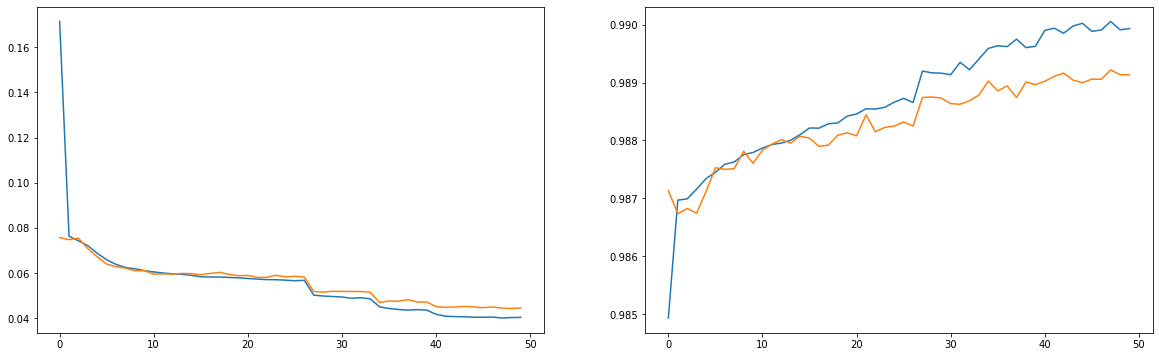

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(history1['loss'])
axes[0].plot(history1['val_loss'])
axes[1].plot(history1['binary_accuracy'])
axes[1].plot(history1['val_binary_accuracy'])

In [73]:
model.save('uec100_inceptv3')

INFO:tensorflow:Assets written to: uec100_inceptv3\assets


In [77]:
model = tf.keras.models.load_model('uec100_inceptv3')

In [78]:
test_generator.reset()
pred=model.predict_generator(test_generator,
verbose=1)

pred_bool = (pred >0.5)
predictions = pred_bool.astype(int)
results=pd.DataFrame(predictions, columns=categories)
results["filename"]=test_generator.filenames
ordered_cols=["filename"]+categories
results=results[ordered_cols]#To get the same column order

91/91 [==============================] - 14s 143ms/step


In [79]:
img =load_img('web_pics/fishpastry.jpg', target_size=(128,128))

77


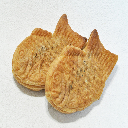

In [80]:
preds = model.predict(np.array([img_to_array(img)/255]))
preds = model.predict(np.array([img_to_array(img)/255]))
print(np.argmax(preds[0]))
img

## ResNet

In [19]:
optimizer = Adam(lr = .001)

inception = ResNet50(weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False
    
x = inception.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(2048,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(100,kernel_regularizer=regularizers.l2(0.005), activation='sigmoid')(x)
model = models.Model(inputs=inception.input, outputs=predictions)
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['binary_accuracy'])
model.summary()

#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [20]:
model.evaluate(test_generator)

91/91 [==============================] - 15s 147ms/step - loss: 1.6700 - binary_accuracy: 0.4445


[1.6699771881103516, 0.44454512000083923]

In [21]:
#With training and validation data
history2 = model.fit(train_generator, validation_data=test_generator,epochs=50, verbose=True,  callbacks=[early_stop, rlrop])

Epoch 1/50
360/360 [==============================] - 67s 180ms/step - loss: 0.1440 - binary_accuracy: 0.9843 - val_loss: 0.0777 - val_binary_accuracy: 0.9866
Epoch 2/50
360/360 [==============================] - 65s 181ms/step - loss: 0.0760 - binary_accuracy: 0.9867 - val_loss: 0.0742 - val_binary_accuracy: 0.9866
Epoch 3/50
360/360 [==============================] - 63s 175ms/step - loss: 0.0738 - binary_accuracy: 0.9867 - val_loss: 0.0729 - val_binary_accuracy: 0.9866
Epoch 4/50
360/360 [==============================] - 64s 178ms/step - loss: 0.0725 - binary_accuracy: 0.9867 - val_loss: 0.0716 - val_binary_accuracy: 0.9866
Epoch 5/50
360/360 [==============================] - 64s 177ms/step - loss: 0.0719 - binary_accuracy: 0.9867 - val_loss: 0.0714 - val_binary_accuracy: 0.9866
Epoch 6/50
360/360 [==============================] - 64s 177ms/step - loss: 0.0715 - binary_accuracy: 0.9867 - val_loss: 0.0710 - val_binary_accuracy: 0.9866
Epoch 7/50
360/360 [==========================

360/360 [==============================] - 66s 184ms/step - loss: 0.0646 - binary_accuracy: 0.9867 - val_loss: 0.0642 - val_binary_accuracy: 0.9866

Epoch 00050: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.


In [23]:
np.save('model_histories/history2_resnet50.npy',history2.history)

In [24]:
history2=np.load('model_histories/history2_resnet50.npy',allow_pickle='TRUE').item()

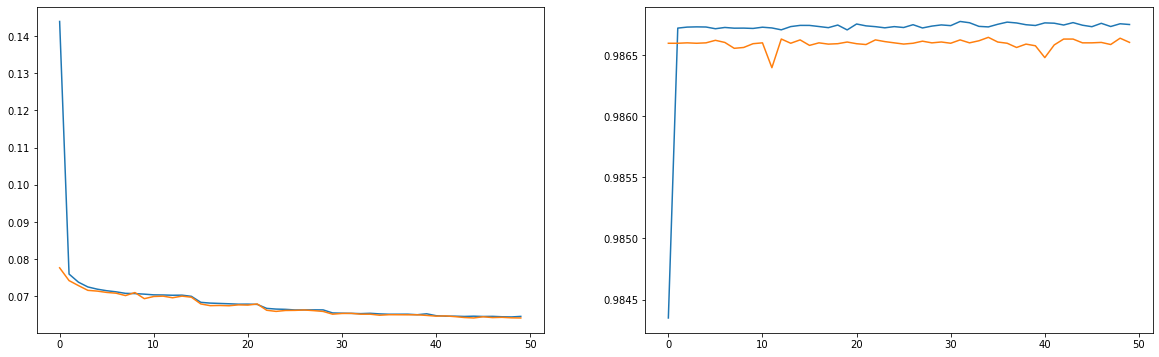

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(history2['loss'])
axes[0].plot(history2['val_loss'])
axes[1].plot(history2['binary_accuracy'])
axes[1].plot(history2['val_binary_accuracy'])

In [26]:
model.save('uec100_resnet')

INFO:tensorflow:Assets written to: uec100_resnet\assets


C:\Users\cheew\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [30]:
model = tf.keras.models.load_model('uec100_resnet')

In [31]:
test_generator.reset()
pred=model.predict_generator(test_generator,
verbose=1)

pred_bool = (pred >0.5)
predictions = pred_bool.astype(int)
results=pd.DataFrame(predictions, columns=categories)
results["filename"]=test_generator.filenames
ordered_cols=["filename"]+categories
results=results[ordered_cols]#To get the same column order

C:\Users\cheew\anaconda3\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


91/91 [==============================] - 14s 149ms/step


In [42]:
model.evaluate(test_generator)

91/91 [==============================] - 14s 148ms/step - loss: 0.0643 - binary_accuracy: 0.9867


[0.06429946422576904, 0.9866511225700378]

In [34]:
img =load_img('web_pics/fishpastry.jpg', target_size=(128,128))

35


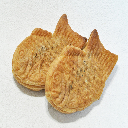

In [43]:
preds = model.predict(np.array([img_to_array(img)/255]))
preds = model.predict(np.array([img_to_array(img)/255]))
print(np.argmax(preds[0]))
img

## VGG16


In [44]:
optimizer = Adam(lr = .001)

inception = VGG16(weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False
    
x = inception.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(2048,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(100,kernel_regularizer=regularizers.l2(0.005), activation='sigmoid')(x)
model = models.Model(inputs=inception.input, outputs=predictions)
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['binary_accuracy'])
model.summary()

#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)


C:\Users\cheew\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [45]:
#With training and validation data
history3 = model.fit(train_generator, validation_data=test_generator,epochs=50, verbose=True,  callbacks=[early_stop, rlrop])

Epoch 1/50
360/360 [==============================] - 70s 189ms/step - loss: 0.1606 - binary_accuracy: 0.9849 - val_loss: 0.0815 - val_binary_accuracy: 0.9869
Epoch 2/50
360/360 [==============================] - 66s 184ms/step - loss: 0.0764 - binary_accuracy: 0.9870 - val_loss: 0.0734 - val_binary_accuracy: 0.9871
Epoch 3/50
360/360 [==============================] - 66s 184ms/step - loss: 0.0723 - binary_accuracy: 0.9871 - val_loss: 0.0704 - val_binary_accuracy: 0.9871
Epoch 4/50
360/360 [==============================] - 66s 184ms/step - loss: 0.0692 - binary_accuracy: 0.9872 - val_loss: 0.0672 - val_binary_accuracy: 0.9872
Epoch 5/50
360/360 [==============================] - 66s 183ms/step - loss: 0.0668 - binary_accuracy: 0.9872 - val_loss: 0.0651 - val_binary_accuracy: 0.9871
Epoch 6/50
360/360 [==============================] - 66s 184ms/step - loss: 0.0654 - binary_accuracy: 0.9873 - val_loss: 0.0658 - val_binary_accuracy: 0.9871
Epoch 7/50
360/360 [==========================

In [46]:
np.save('model_histories/history3_VGG16.npy',history3.history)

In [47]:
history3=np.load('model_histories/history3_VGG16.npy',allow_pickle='TRUE').item()

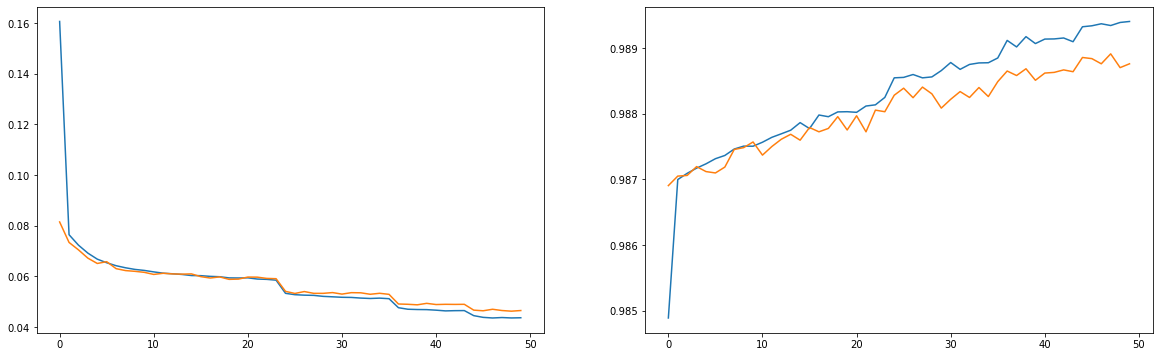

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(history3['loss'])
axes[0].plot(history3['val_loss'])
axes[1].plot(history3['binary_accuracy'])
axes[1].plot(history3['val_binary_accuracy'])

In [49]:
model.evaluate(test_generator)

91/91 [==============================] - 13s 139ms/step - loss: 0.0468 - binary_accuracy: 0.9887


[0.04677757993340492, 0.9887419939041138]

In [50]:
model.save('uec100_VGG16')

INFO:tensorflow:Assets written to: uec100_VGG16\assets


In [51]:
model = tf.keras.models.load_model('uec100_VGG16')

In [55]:
test_generator.reset()
pred=model.predict_generator(test_generator,
verbose=1)

pred_bool = (pred >0.5)
predictions = pred_bool.astype(int)
results=pd.DataFrame(predictions, columns=categories)
results["filename"]=test_generator.filenames
ordered_cols=["filename"]+categories
results=results[ordered_cols]#To get the same column order

91/91 [==============================] - 13s 141ms/step


In [56]:
img =load_img('web_pics/fishpastry.jpg', target_size=(128,128))

77


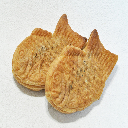

In [57]:
preds = model.predict(np.array([img_to_array(img)/255]))
preds = model.predict(np.array([img_to_array(img)/255]))
print(np.argmax(preds[0]))
img

## Image Loader and Without Augmentation

In [58]:
no_augment_datagen=ImageDataGenerator(
        rescale=1./255,
        fill_mode='nearest')

train_gen_no_augment = no_augment_datagen.flow_from_dataframe(   
    dataframe=train_df,
    directory="./UECFOOD100_CROP/UECFOOD100_CROP/train",
    x_col="filename",
    y_col=categories,
    shuffle=False,
    batch_size=32,
    seed=42,
    class_mode="raw",
    target_size=(128,128))

test_gen_no_augment = no_augment_datagen.flow_from_dataframe(   
    dataframe=test_df,
    directory="./UECFOOD100_CROP/UECFOOD100_CROP/test",
    x_col="filename",
    y_col=categories,
    shuffle=False,
    batch_size=32,
    seed=42,
    class_mode="raw",
    target_size=(128,128))

Found 11514 validated image filenames.
Found 2902 validated image filenames.


## Multi Output